In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("bank-full.csv", sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape


(45211, 17)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df["y"].value_counts()


y
no     39922
yes     5289
Name: count, dtype: int64

In [7]:
df["y"] = df["y"].map({"yes": 1, "no": 0})


In [8]:
df["y"].value_counts()


y
0    39922
1     5289
Name: count, dtype: int64

In [9]:
X = df.drop("y", axis=1)
y = df["y"]


In [10]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [11]:
X_encoded.shape


(45211, 42)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [13]:
dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8983744332632976
[[7806  179]
 [ 740  318]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.64      0.30      0.41      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [15]:
importances = dt.feature_importances_
features = X_encoded.columns

imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(10)

imp_df


,Feature,Importance
3,duration,0.551016
40,poutcome_success,0.297207
24,housing_yes,0.049952
0,age,0.026724
5,pdays,0.017373
34,month_mar,0.016705
27,contact_unknown,0.015592
37,month_oct,0.010170
35,month_may,0.005023
18,marital_married,0.002160


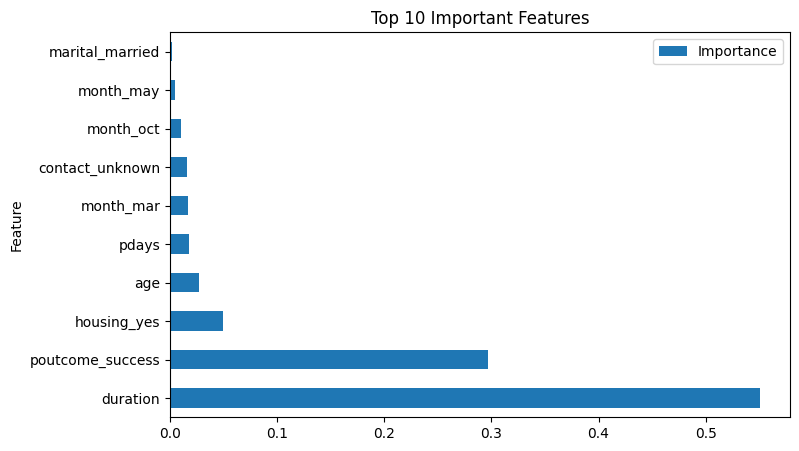

In [16]:
imp_df.plot(kind="barh", x="Feature", y="Importance", figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()


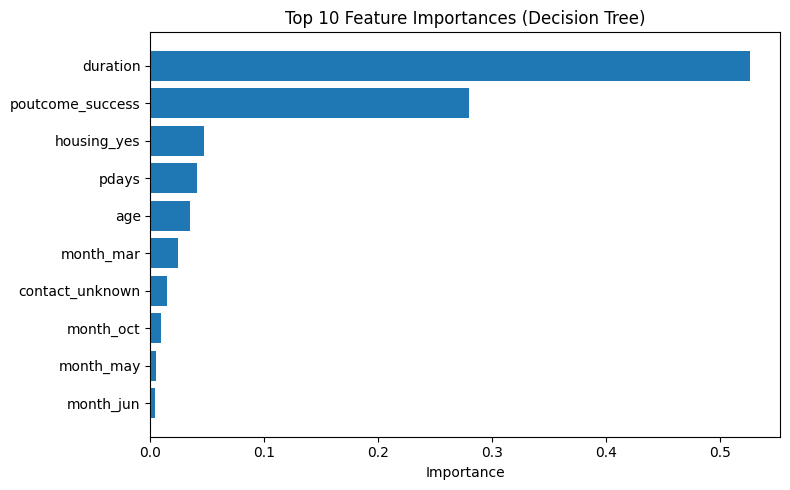

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

importance = dt.feature_importances_
features = X_encoded.columns

imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(imp_df["Feature"], imp_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
